<a href="https://colab.research.google.com/github/akashakash19/Student-performance-prediction/blob/main/Student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#**DATA COLLECTION AND ANALYZING**

In [ ]:
#import student dataset
student_data = pd.read_csv('/content/Student_Performance.csv')
student_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
#Finding number of rows and number of columns
student_data.shape

(10000, 6)

In [ ]:
#Find the information about dataset
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
#checking for missing values
student_data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Not have any missing value

In [ ]:
#Findind the unique value
print("Hours Studied unique value :",student_data['Hours Studied'].unique())
print("="*50)
print("Sample Question Papers Practiced unique value:",student_data['Sample Question Papers Practiced'].unique())
print("="*50)
print("Sleep Hours unique value :",student_data['Sleep Hours'].unique())


Hours Studied unique value : [7 4 8 5 3 6 2 1 9]
Sample Question Papers Practiced unique value: [1 2 5 6 0 8 3 4 9 7]
Sleep Hours unique value : [9 4 7 5 8 6]


In [ ]:
student_data['Extracurricular Activities'].value_counts()

,count
Extracurricular Activities,
No,5052
Yes,4948


**Data Analysis**

In [ ]:
#statistical measurements in dataset
student_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


#**Distribution**

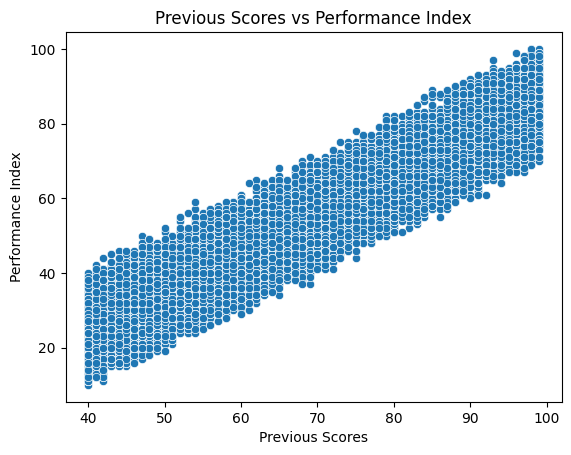

In [ ]:
sns.scatterplot(x="Previous Scores",y="Performance Index",data=student_data)
plt.title("Previous Scores vs Performance Index")
plt.show()

This graph shows positive correlation X increase and Y also increase

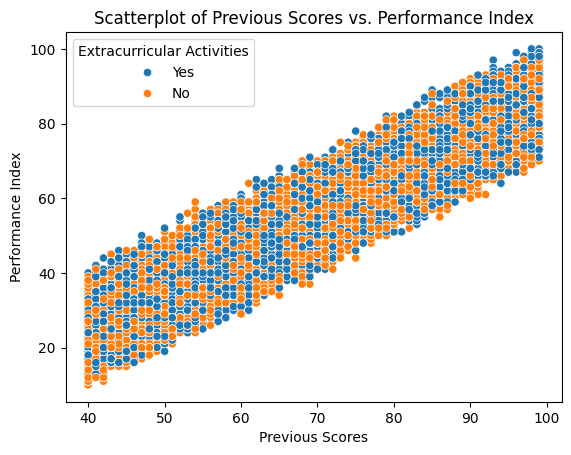

In [ ]:
sns.scatterplot(x="Previous Scores",y="Performance Index",hue= "Extracurricular Activities",data=student_data)
plt.title("Scatterplot of Previous Scores vs. Performance Index")
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.show()

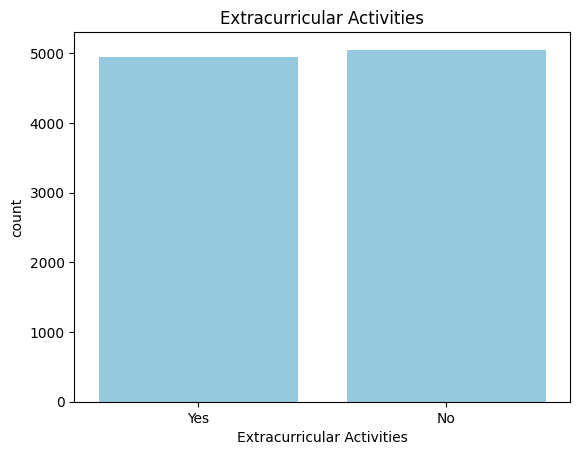

In [ ]:
sns.countplot(x="Extracurricular Activities",data=student_data ,color='skyblue')
plt.title("Extracurricular Activities")
plt.show()

In [ ]:
student_data['Extracurricular Activities'].value_counts()

,count
Extracurricular Activities,
No,5052
Yes,4948


/tmp/ipython-input-1626734225.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_data[col])
/tmp/ipython-input-1626734225.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_data[col])
/tmp/ipython-input-1626734225.py:5: UserWarning: 

`distplot` is a deprecated function and wil

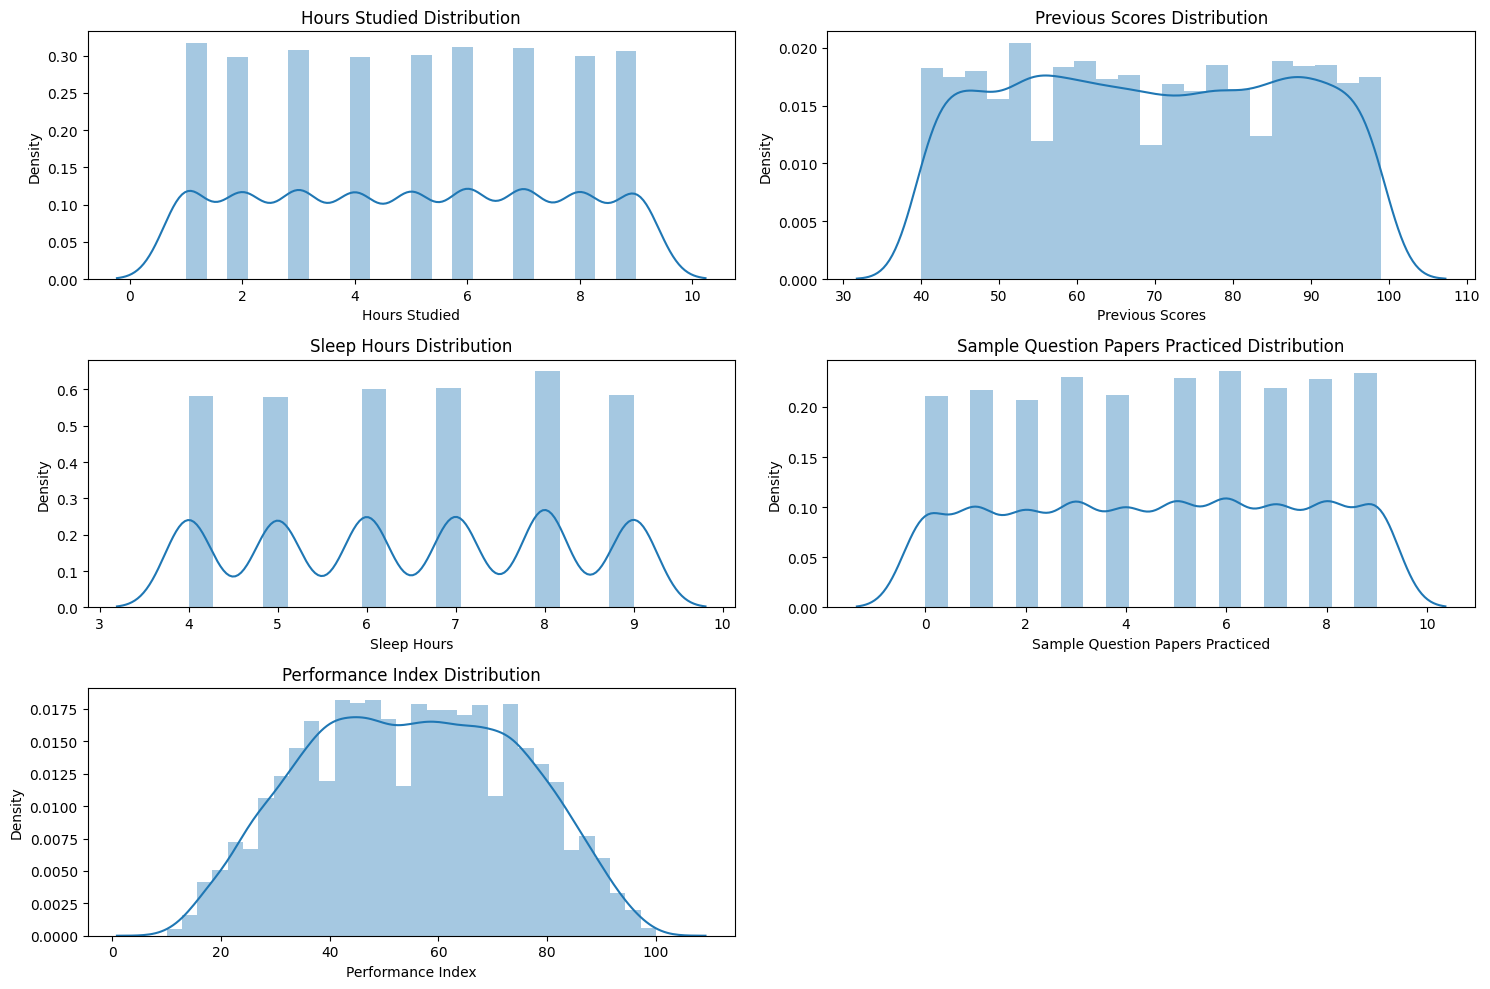

In [ ]:
#Normal distribution plots for all columns data
plt.figure(figsize=(15,10))
for i, col in enumerate(["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Performance Index"]):
  plt.subplot(3,2,i+1)
  sns.distplot(student_data[col])
  plt.title(f"{col} Distribution")
  plt.tight_layout()
plt.show()

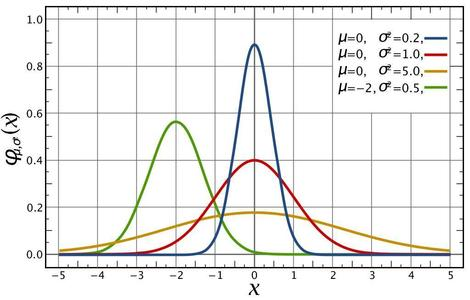

#**Training and testing the data**

In [ ]:
X = student_data.drop(columns='Performance Index', axis=1)
Y = student_data['Performance Index']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

print(X.shape, X_train.shape, X_test.shape)

print(Y.shape,Y_train.shape,Y_test.shape)

(10000, 5) (8000, 5) (2000, 5)
(10000,) (8000,) (2000,)


In [ ]:
#replace the Extracurricular Activities categorical name to numerical numbers " Yes : 1" "No : 0"
student_data['Extracurricular Activities'].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
student_data['Extracurricular Activities'].unique()

array([1, 0])

In [ ]:
student_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


#**Machine learning models**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_model_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}


In [ ]:
for name, model in models.items():

    model.fit(X_train_processed, Y_train)

    Y_train_pred = model.predict(X_train_processed)
    Y_test_pred  = model.predict(X_test_processed)

    train_mae, train_rmse, train_r2 = calculate_model_metrics(Y_train, Y_train_pred)
    test_mae, test_rmse, test_r2    = calculate_model_metrics(Y_test, Y_test_pred)

    print(f"Model : {name}")
    print("Train RMSE :", train_rmse)
    print("Test  RMSE :", test_rmse)
    print("Train R2   :", train_r2)
    print("Test  R2   :", test_r2)
    print("-" * 50)


Model : LinearRegression
Train RMSE : 2.042665683405574
Test  RMSE : 2.0174931453793326
Train R2   : 0.9886611170188228
Test  R2   : 0.9890954655668953
--------------------------------------------------
Model : Ridge
Train RMSE : 2.042665693895384
Test  RMSE : 2.0174949607901995
Train R2   : 0.9886611169023645
Test  R2   : 0.9890954459423238
--------------------------------------------------
Model : Lasso
Train RMSE : 2.2082974907298234
Test  RMSE : 2.1753377123233544
Train R2   : 0.9867477126064509
Test  R2   : 0.9873224196881256
--------------------------------------------------
Model : ElasticNet
Train RMSE : 2.2180561291648924
Test  RMSE : 2.1945533370173043
Train R2   : 0.9866303280342312
Test  R2   : 0.9870974582345367
--------------------------------------------------
Model : KNeighborsClassifier
Train RMSE : 3.2136038959398836
Test  RMSE : 3.773194932679731
Train R2   : 0.9719353016837425
Test  R2   : 0.9618581742678505
--------------------------------------------------
Model :